In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

In [2]:
bank = pd.read_csv("/content/credit_scoring.csv")
bank.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [6]:
print(bank.isnull().sum())
print(bank.duplicated().sum())
print(bank.shape)
print(bank.info())
print(bank.describe())
print(np.isinf(bank).sum())

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64
0
(1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   int64  
 2   Marital Status             1000 non-null   int64  
 3   Education Level            1000 non-null   int64  
 4   Employment Status          1000 non-null   int64  
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   

# ***preproccessing***

In [ ]:
# this cell just for convert categorical to numeric(maping)
# from figure out the number of each Variable
# just for dataset
counts1 = bank["Gender"].value_counts()
counts2 = bank["Marital Status"].value_counts()
counts3 = bank["Education Level"].value_counts()
counts4 = bank["Employment Status"].value_counts()
counts5 = bank["Type of Loan"].value_counts()
print(counts1)
print(counts2)
print(counts3)
print(counts4)
print(counts5)

Gender
Male      501
Female    499
Name: count, dtype: int64
Marital Status
Married     350
Divorced    326
Single      324
Name: count, dtype: int64
Education Level
Master         262
High School    250
PhD            245
Bachelor       243
Name: count, dtype: int64
Employment Status
Self-Employed    347
Employed         328
Unemployed       325
Name: count, dtype: int64
Type of Loan
Auto Loan        348
Home Loan        328
Personal Loan    324
Name: count, dtype: int64


In [5]:
bank["Gender"] = (bank["Gender"] == "Male").astype(int)
bank["Marital Status"] = bank["Marital Status"].map({"Married":3,"Divorced":2,"Single":1})
bank["Education Level"] = bank["Education Level"].map({"Master":4,"High School":3,"PhD":2,"Bachelor":1})
bank["Employment Status"] = bank["Employment Status"].map({"Self-Employed":3,"Employed":2,"Unemployed":1})
bank["Type of Loan"] = bank["Type of Loan"].map({"Auto Loan":3,"Home Loan":2,"Personal Loan":1})

In [3]:
cols = ["Age", "Gender", "Marital Status","Education Level", "Employment Status",
        "Credit Utilization Ratio","Payment History", "Number of Credit Accounts",
        "Loan Amount","Interest Rate","Loan Term","Type of Loan"]

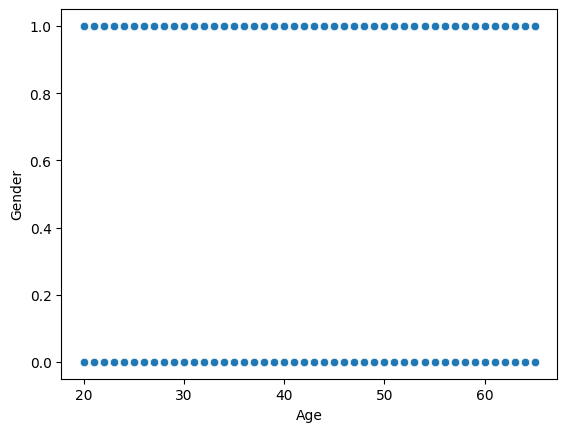

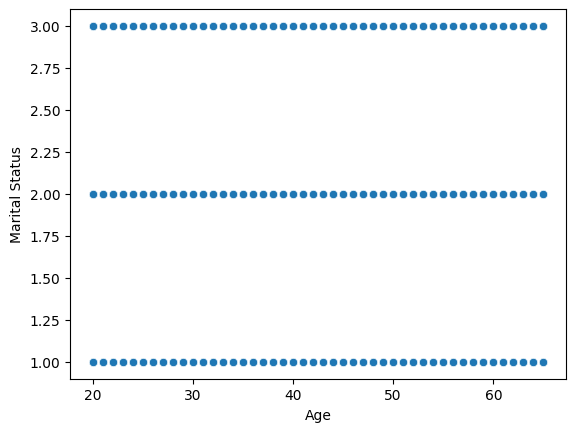

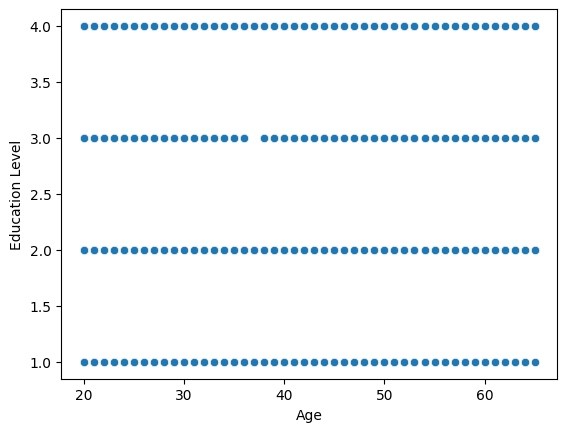

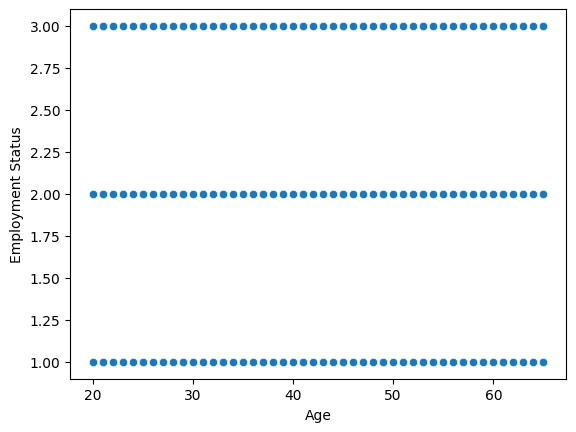

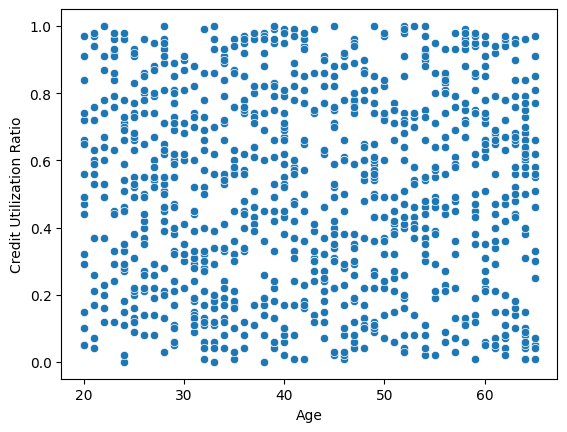

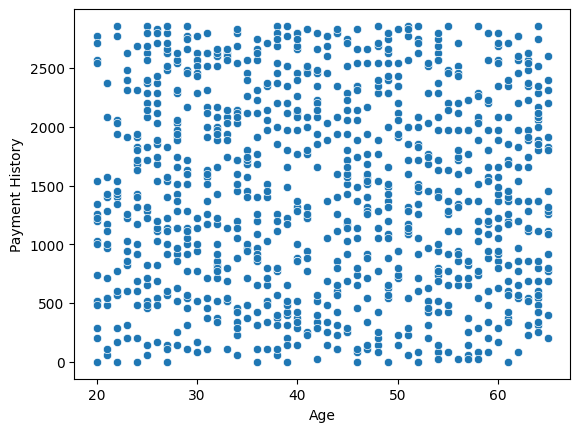

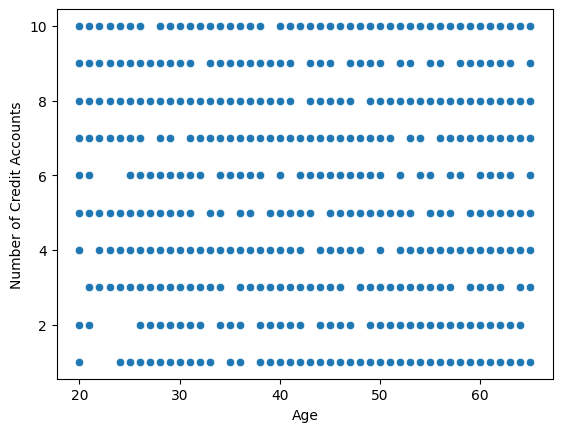

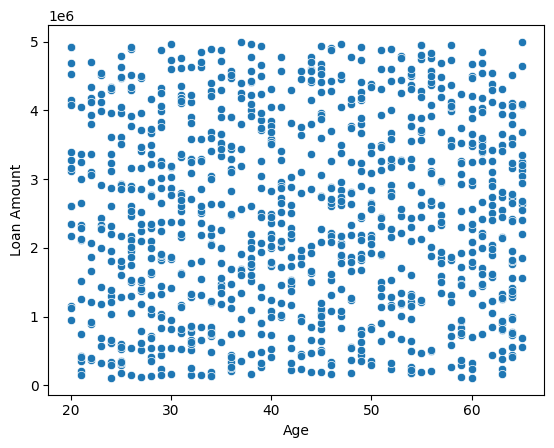

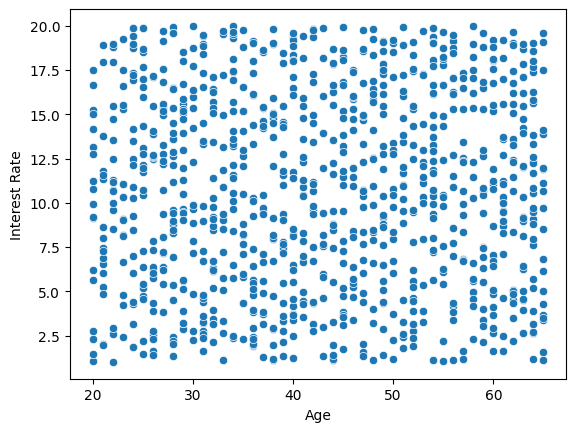

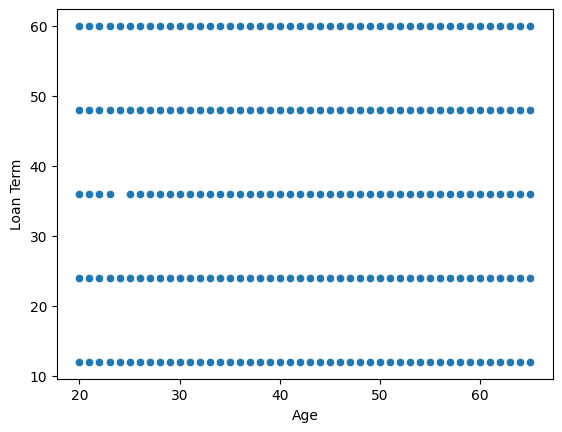

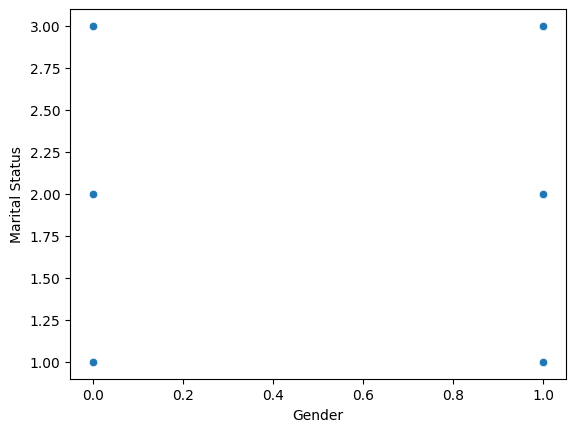

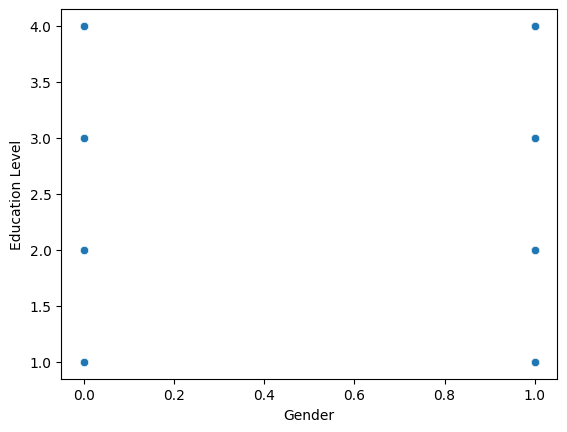

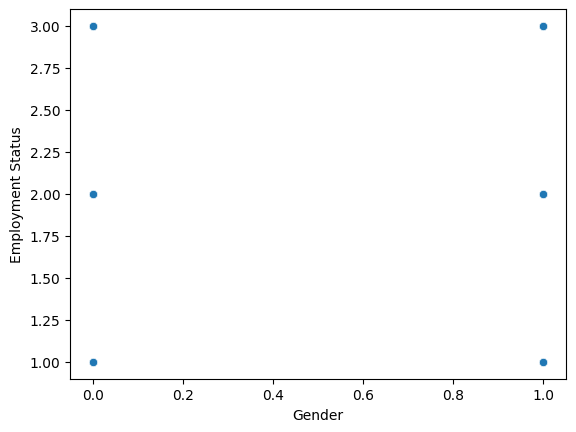

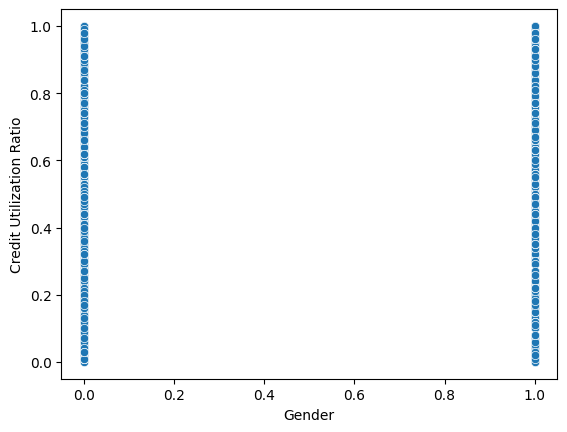

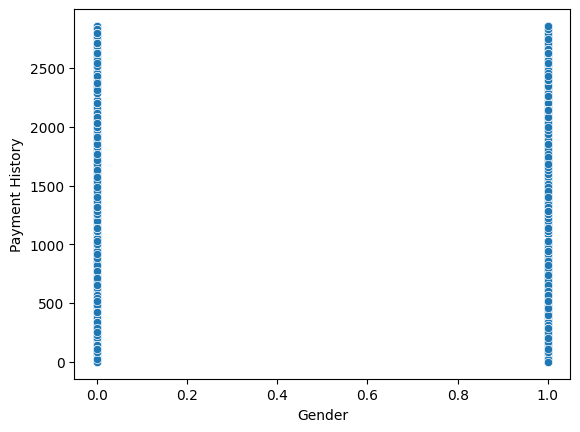

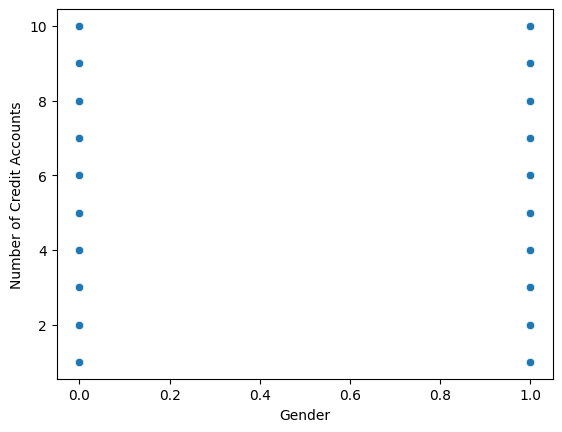

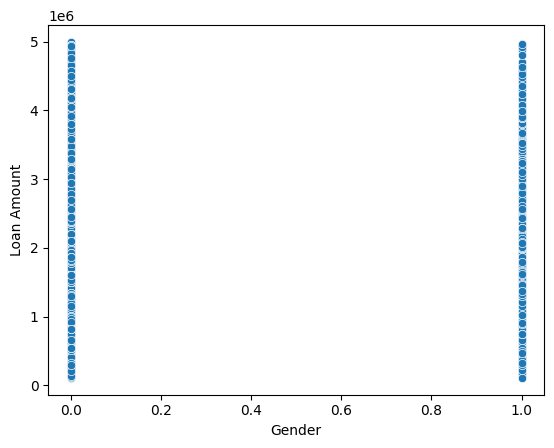

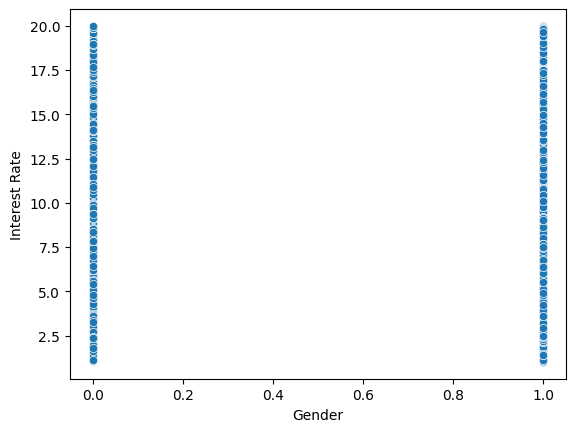

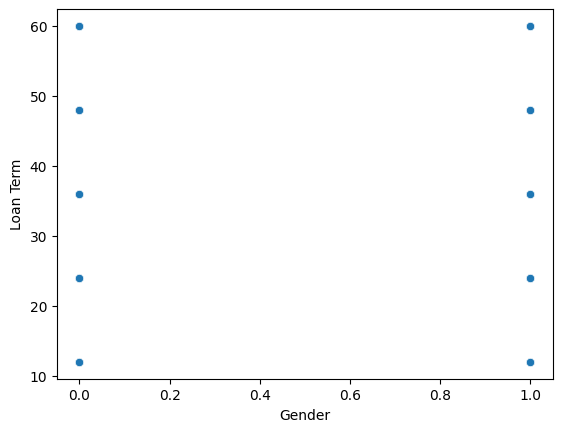

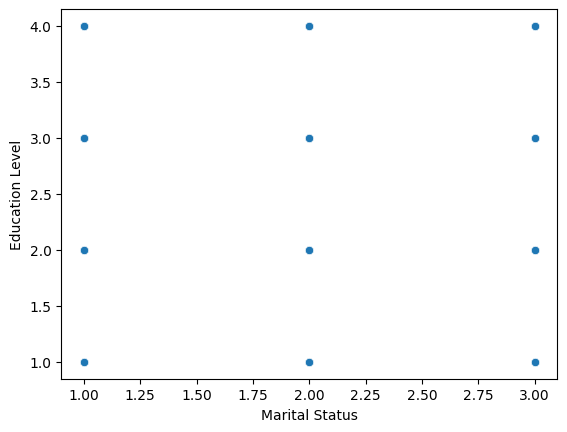

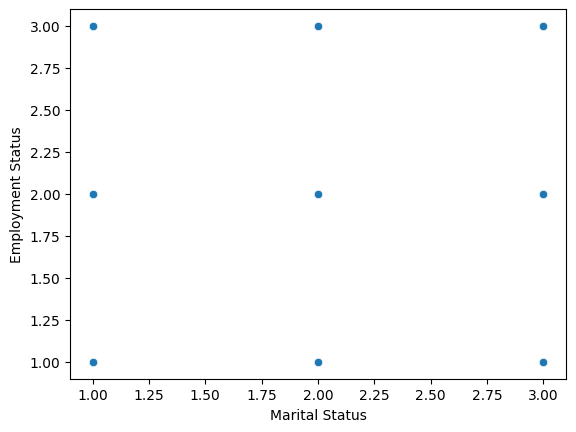

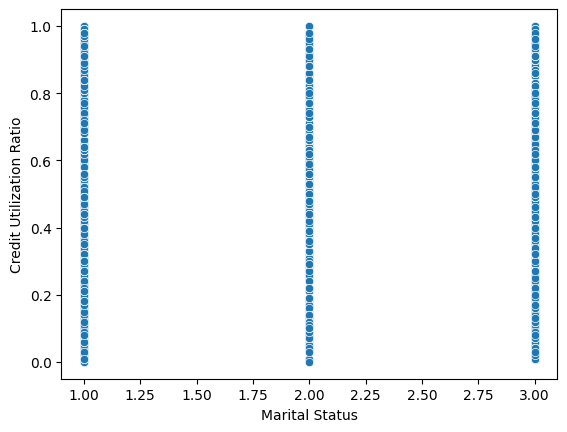

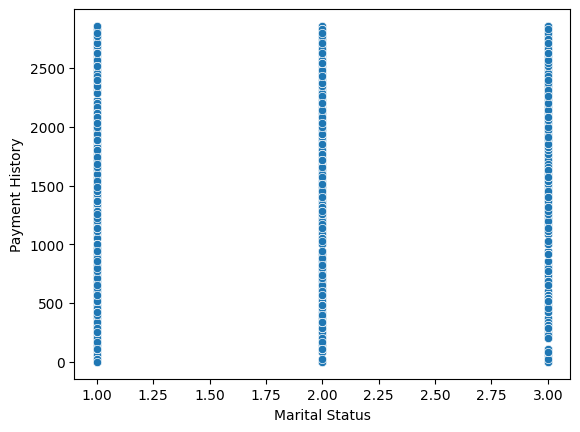

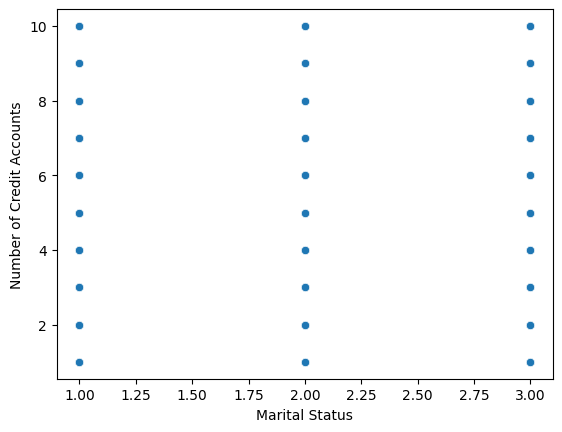

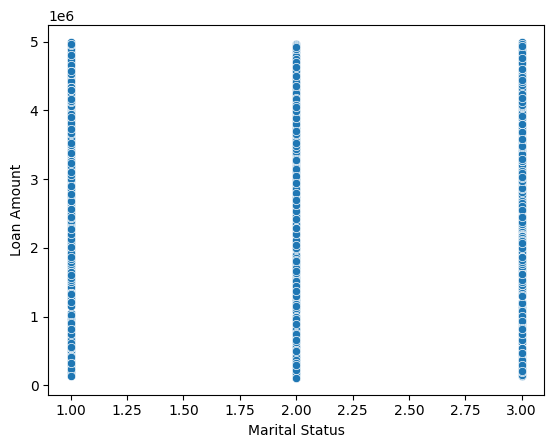

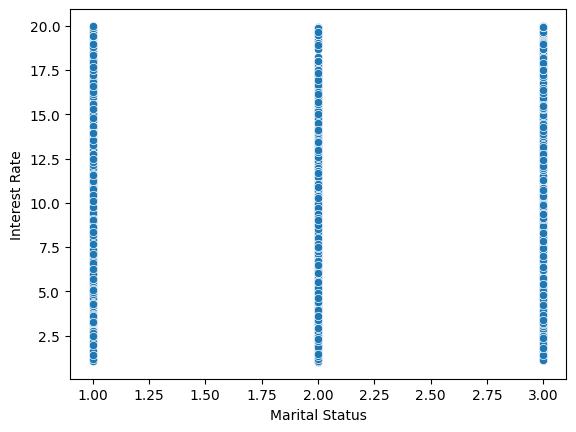

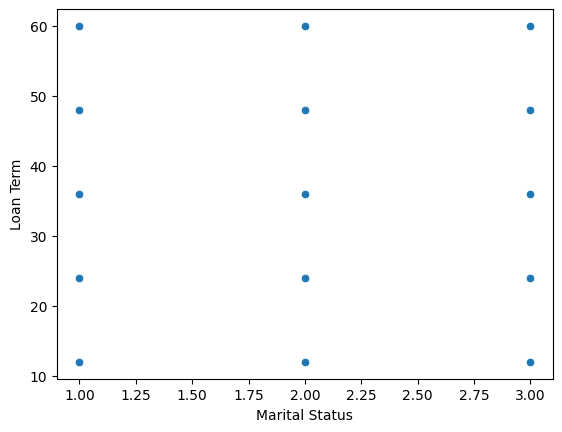

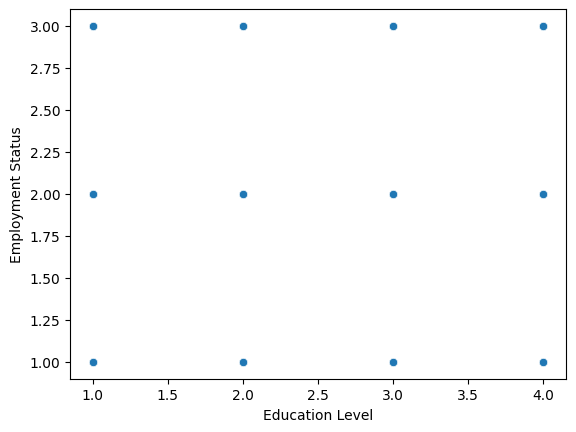

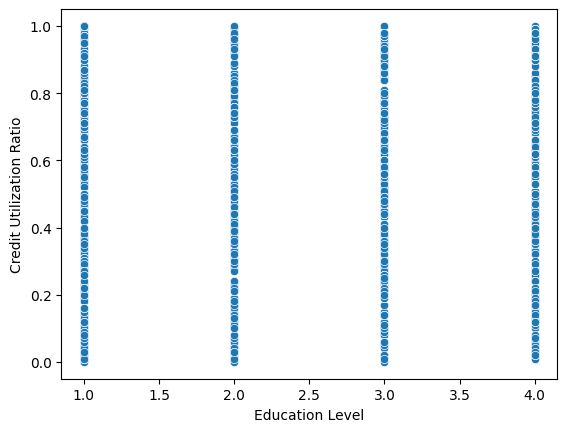

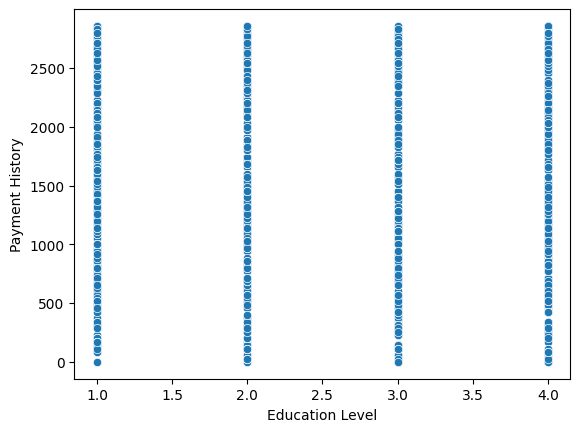

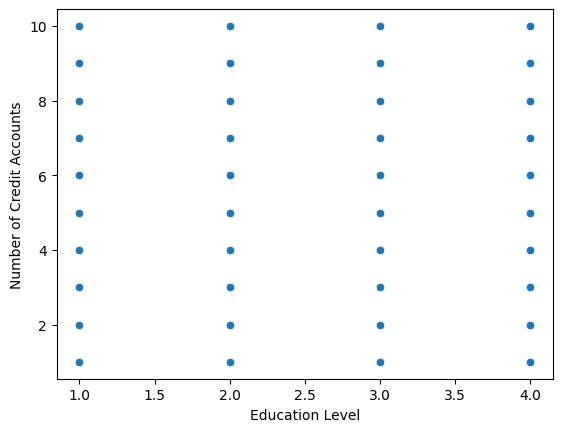

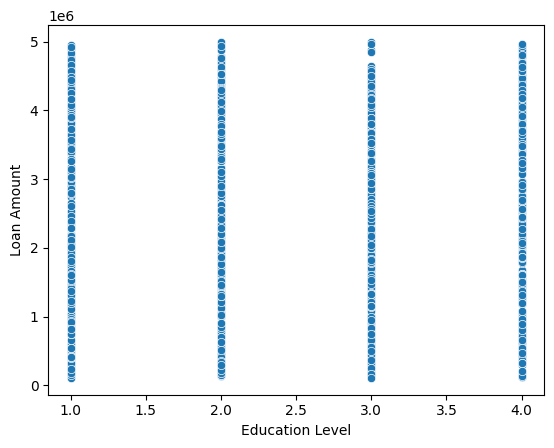

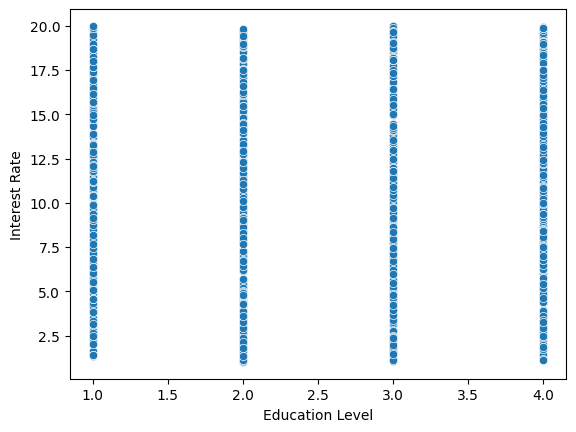

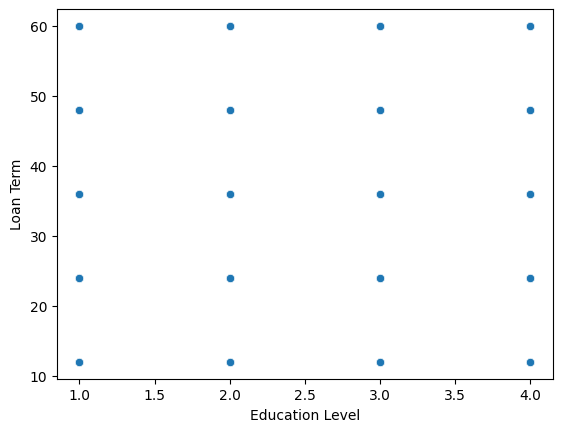

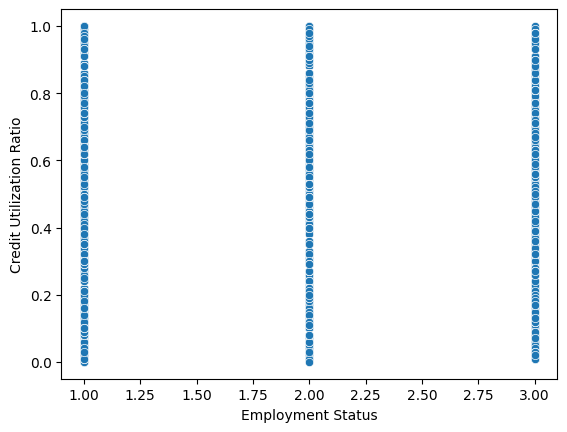

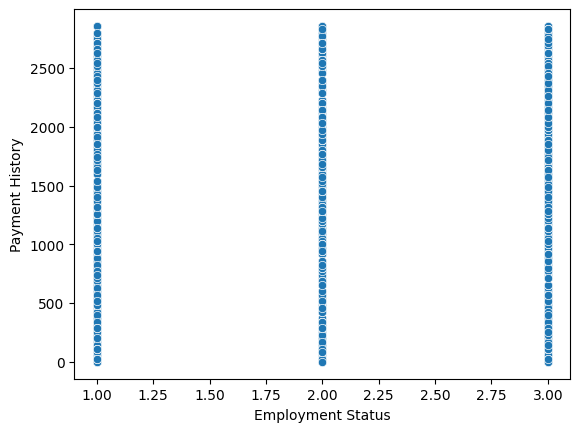

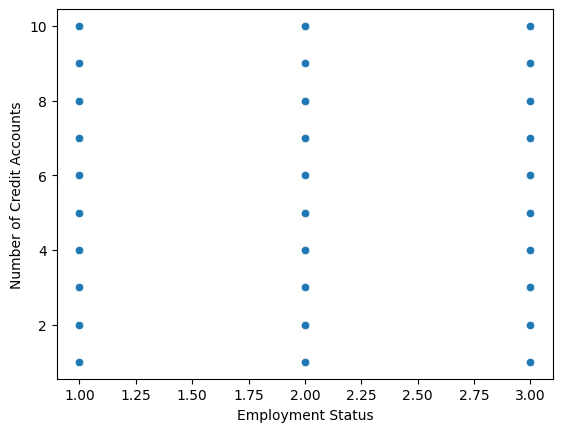

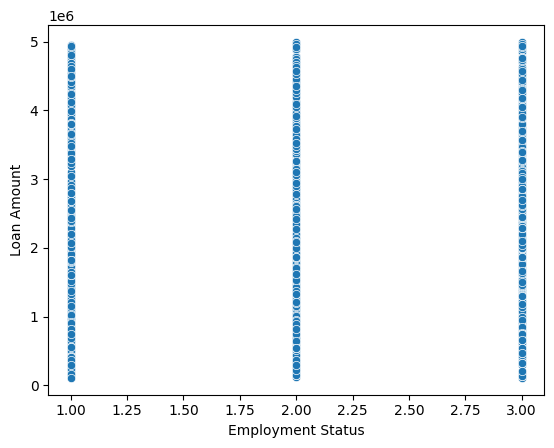

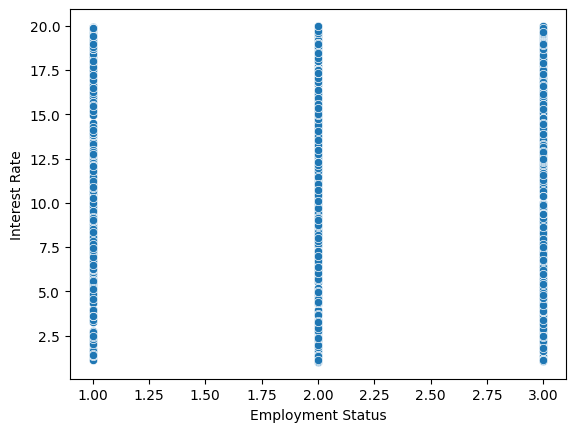

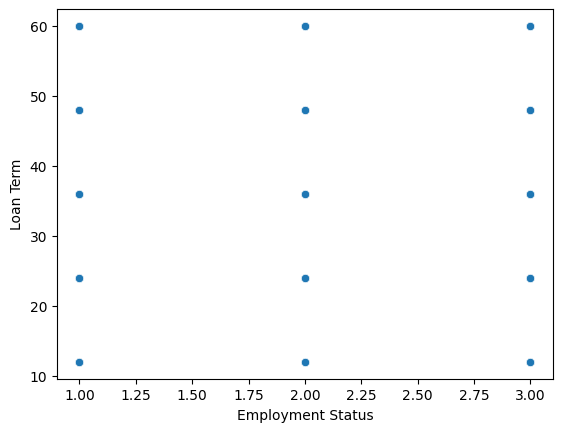

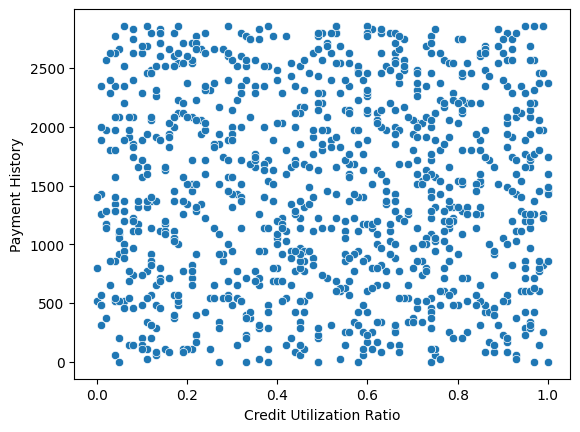

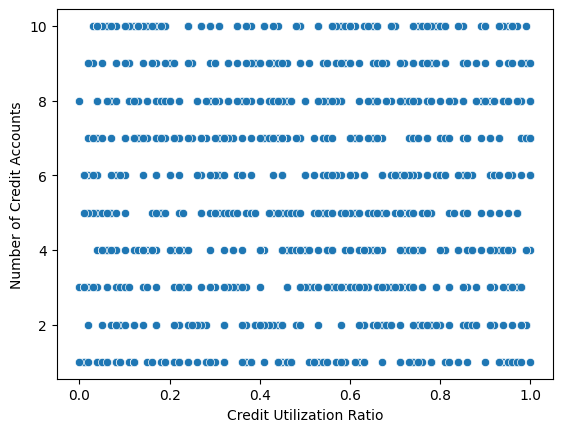

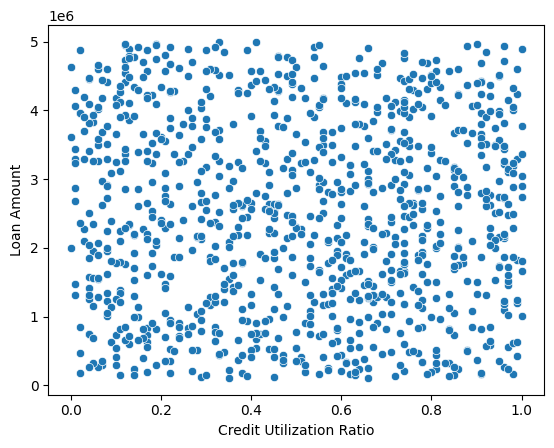

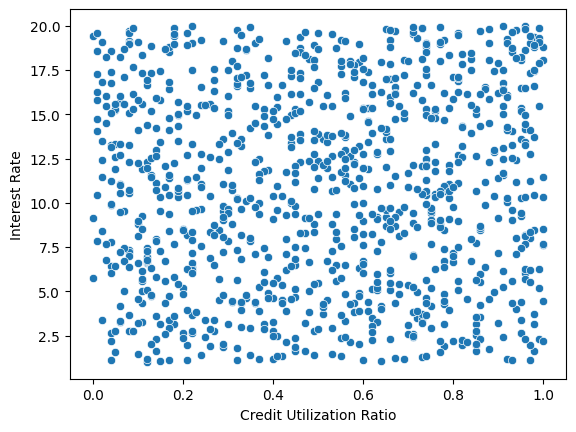

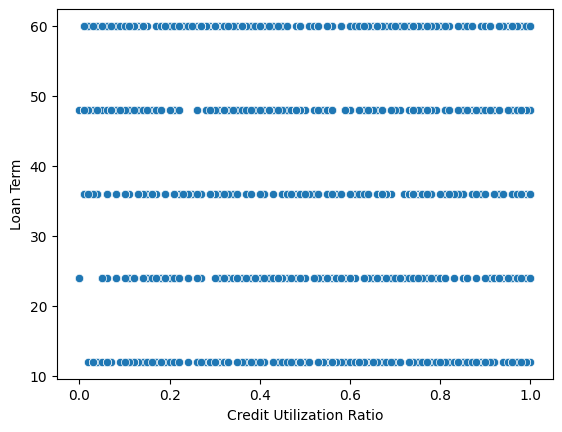

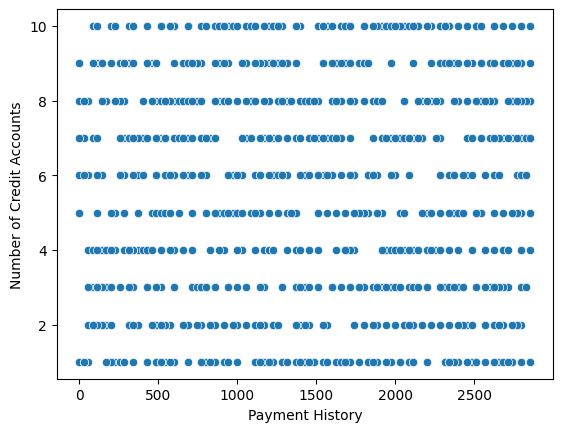

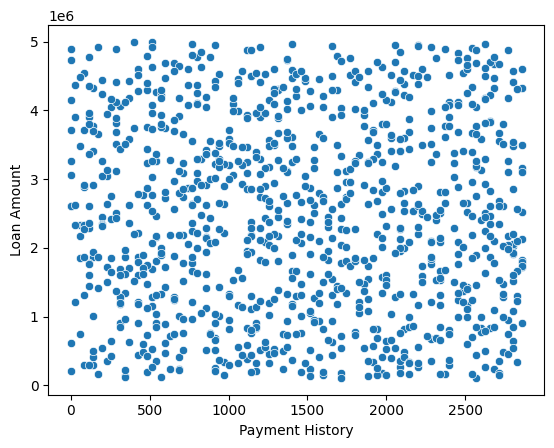

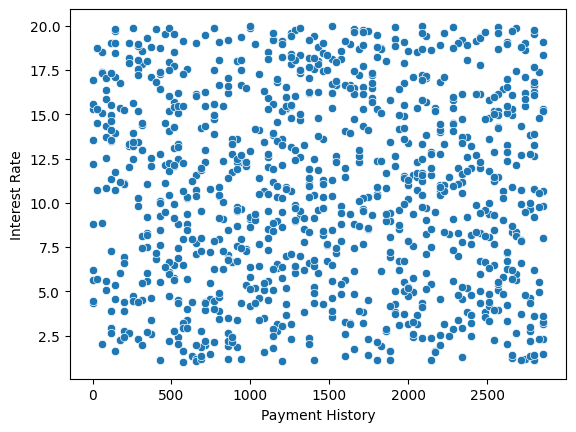

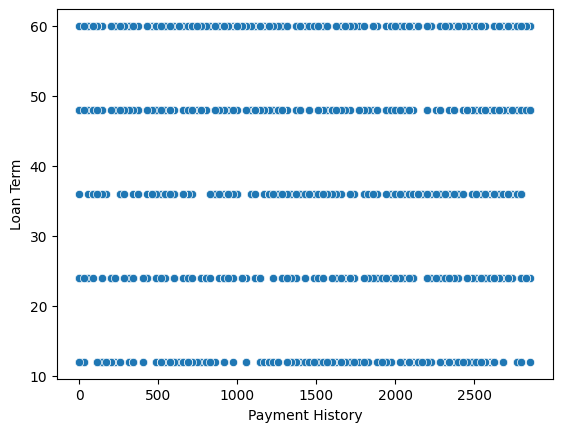

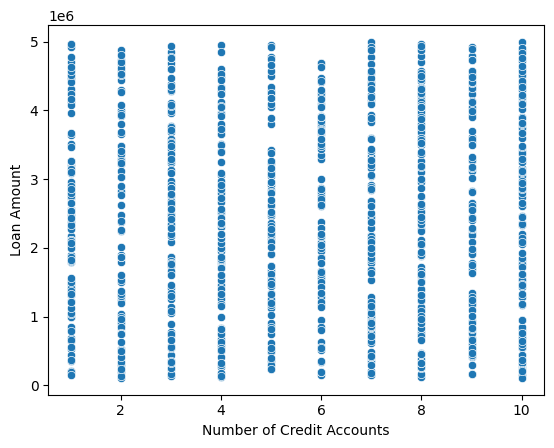

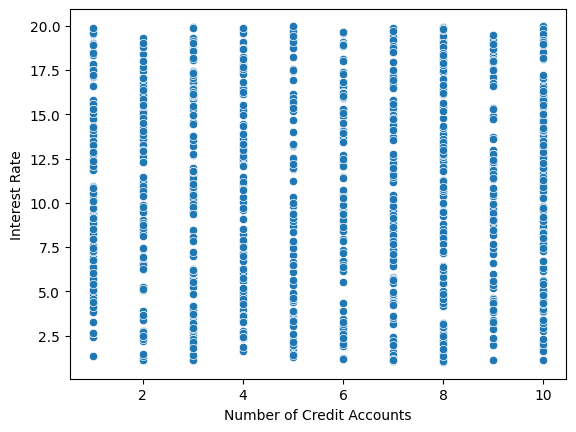

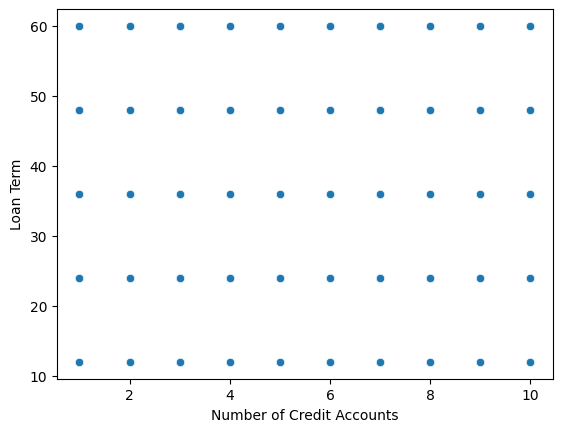

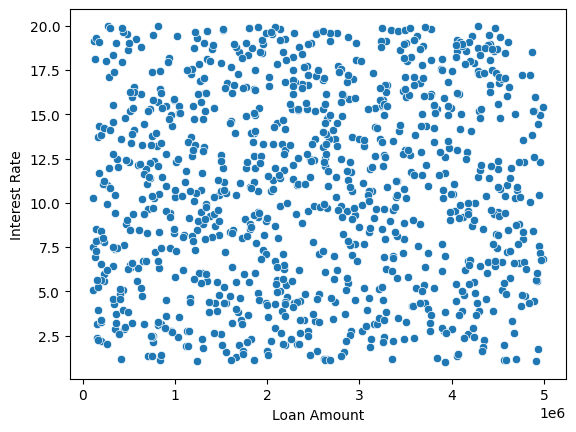

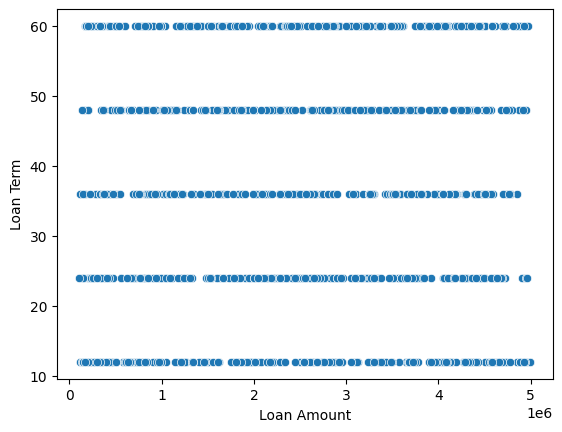

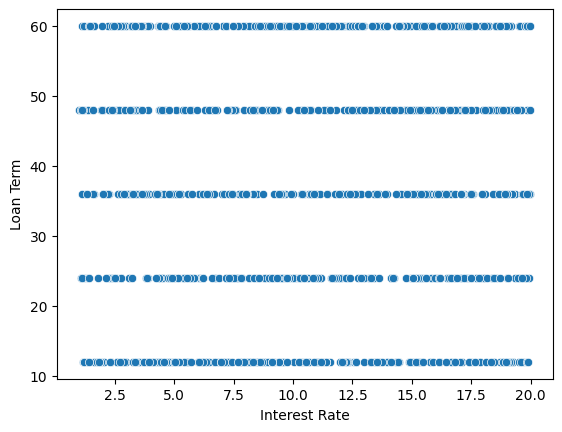

In [7]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=bank)#, hue='class')
    plt.show()

<ipython-input-28-65df4f35e2fc>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank[x], bins=20)
<ipython-input-28-65df4f35e2fc>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank[x], bins=20)
<ipython-input-28-65df4f35e2fc>:7: UserWarning: 

`distplot` is a deprecated function and will be 

<Figure size 1500x600 with 0 Axes>

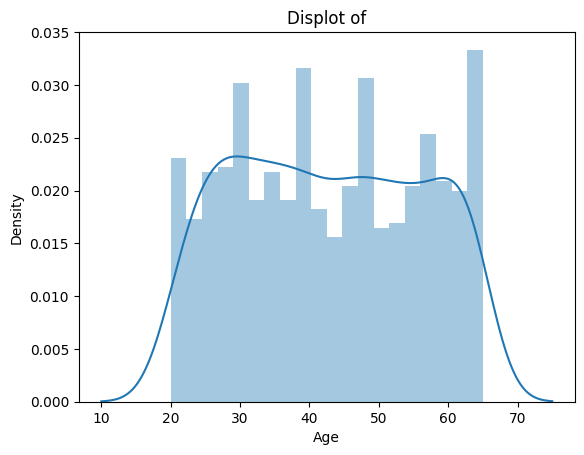

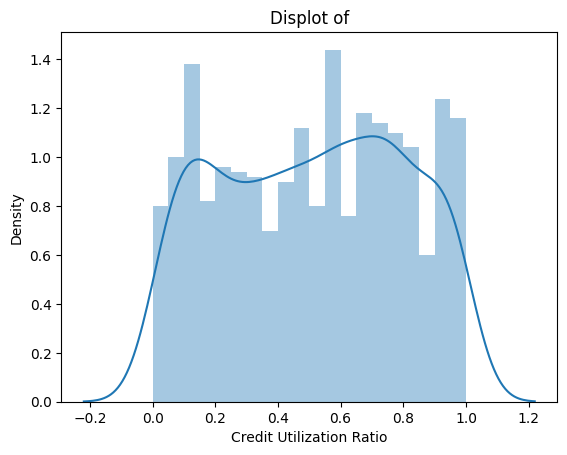

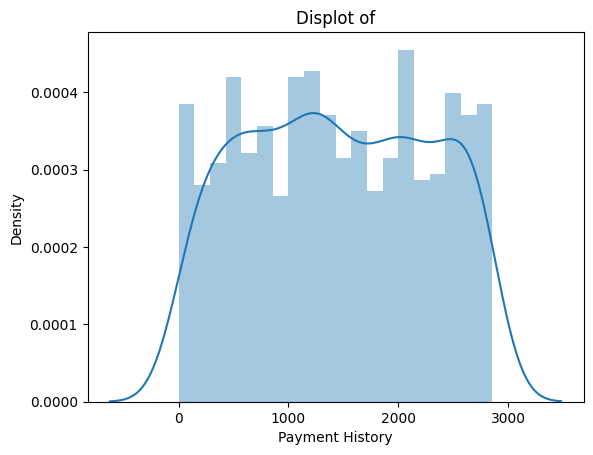

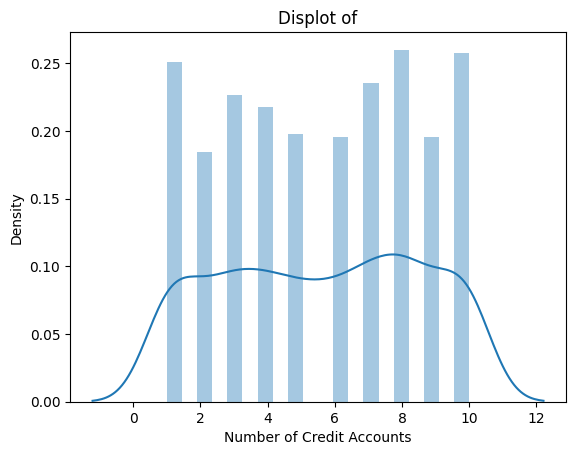

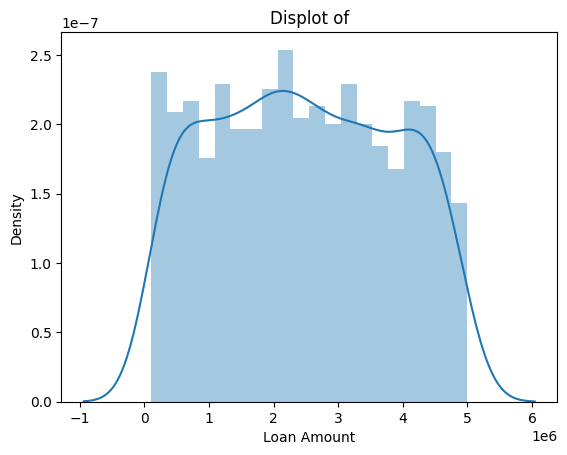

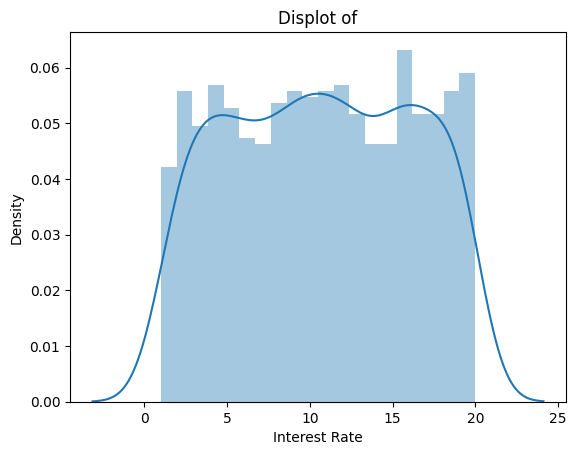

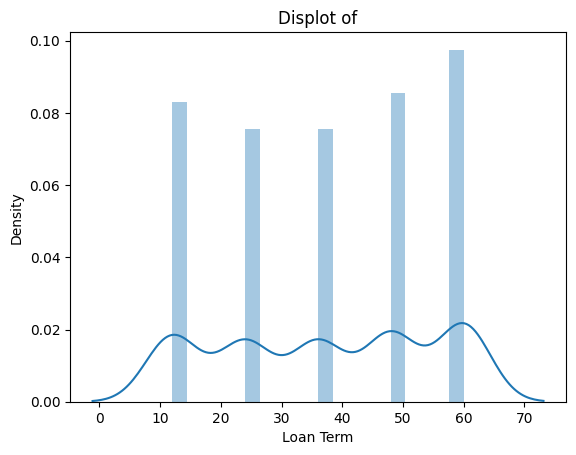

In [ ]:
plt.figure(1, figsize=(15,6))

for x in ["Age","Credit Utilization Ratio","Payment History","Number of Credit Accounts","Loan Amount","Interest Rate","Loan Term"]:
          n = 1
          plt.subplots(1,n)
          plt.subplots_adjust(hspace=0.5, wspace=0.5)
          sns.distplot(bank[x], bins=20)
          plt.title("Displot of".format(x))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

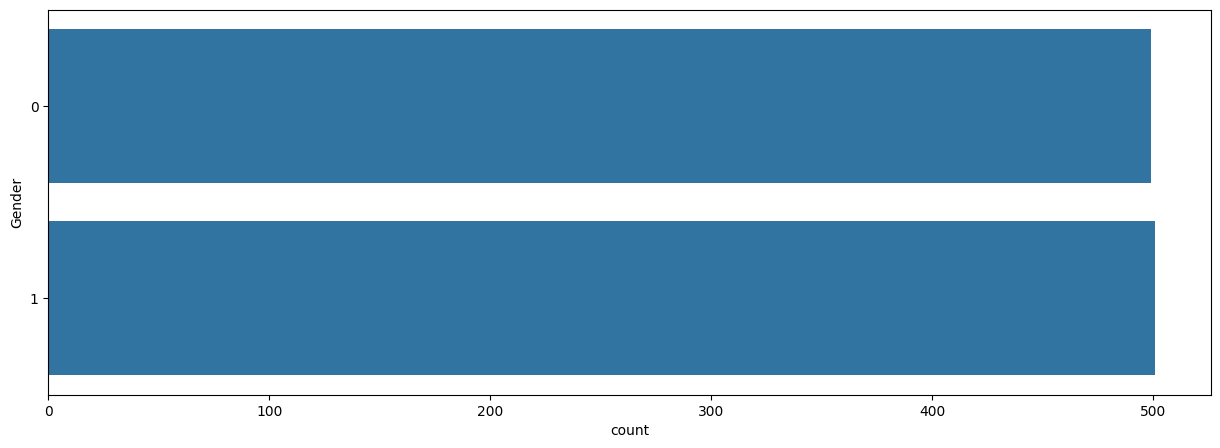

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender",data=bank)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

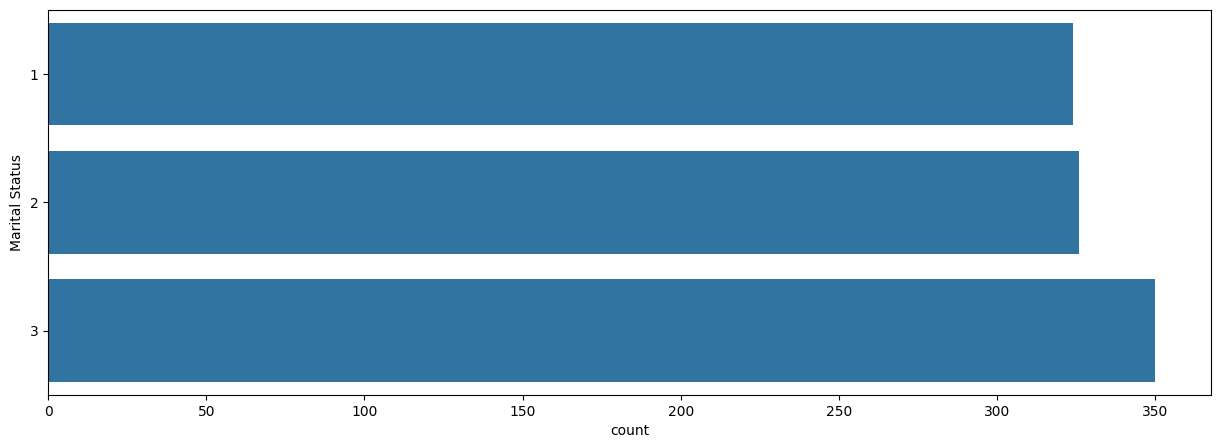

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="Marital Status",data=bank)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

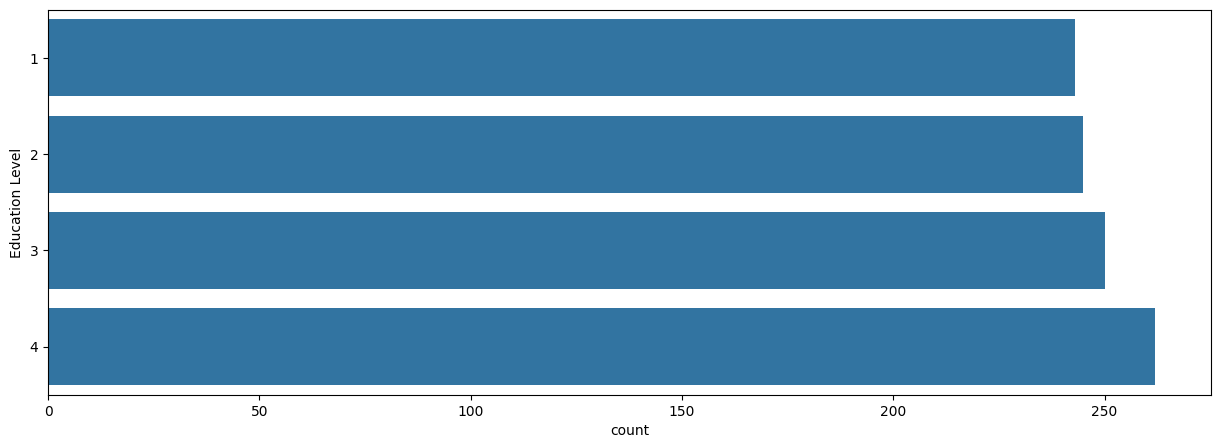

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="Education Level",data=bank)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

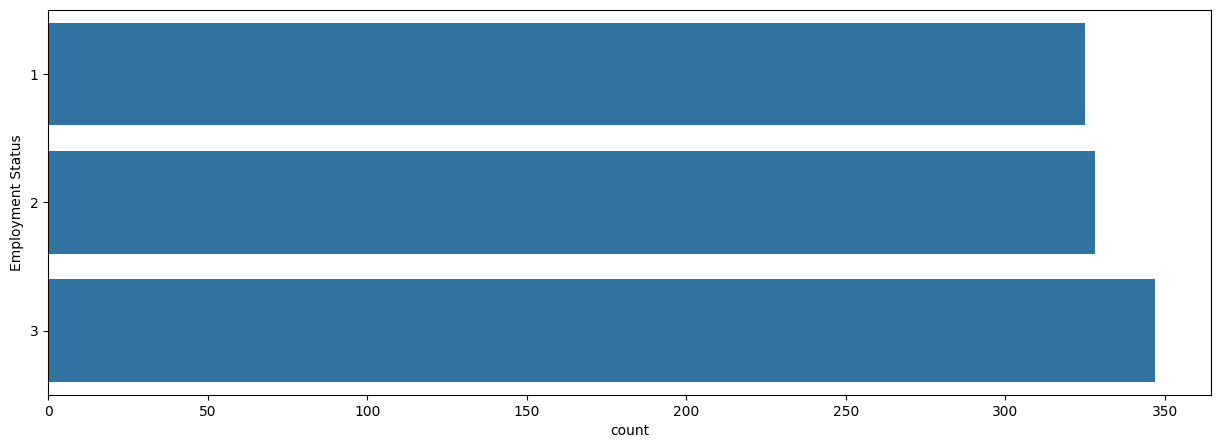

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="Employment Status",data=bank)
plt.show

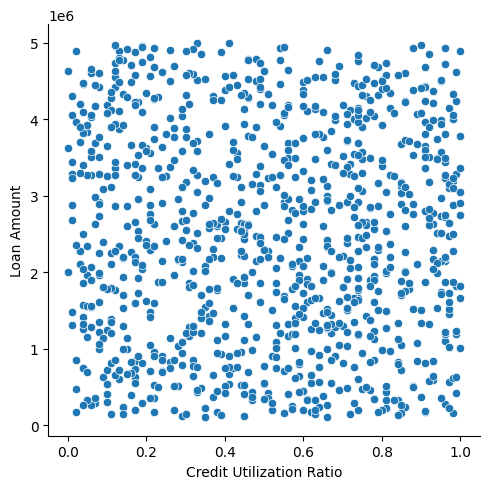

In [ ]:
sns.relplot(x="Credit Utilization Ratio",y="Loan Amount",data=bank)

In [ ]:
bank.shape

(1000, 12)

In [ ]:
# scaler = StandardScaler()
# bank = scaler.fit_transform(bank)
# bank

# *find the number of clusters with two ways*

# ***silhouette***

In [18]:
sil = []
for k in np.arange(2,11):
  kmn = KMeans(n_clusters=k, random_state=42)
  labels = kmn.fit_predict(bank)
  sil.append(silhouette_score(bank,labels))
sil

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[0.6169395167348238,
 0.5887763857009009,
 0.5734721401632897,
 0.5692235542548972,
 0.5598538050313365,
 0.5556240931308452,
 0.5522539829296466,
 0.5563601655226982,
 0.5542861188723461]

the point is upper than others is the best

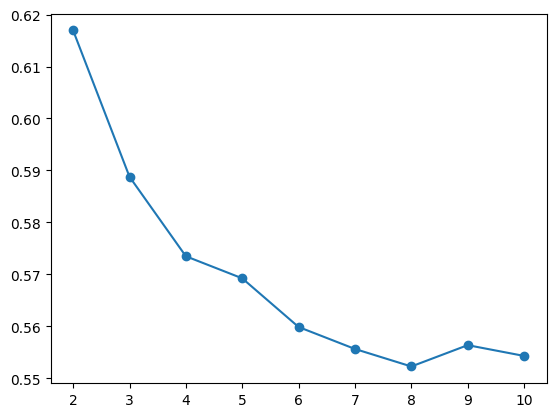

In [19]:
plt.plot(np.arange(2,11), sil ,marker='o')
plt.show()

# ***inertia***

In [8]:
i = []
for k in np.arange(1,10):
  kmn = KMeans(n_clusters=k)
  kmn.fit(bank)
  i.append(kmn.inertia_)
i

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[1921975273510222.2,
 498936325897845.06,
 217937371137660.2,
 121471795336135.92,
 76494763970359.03,
 54619892408291.266,
 40090271088261.305,
 30427862046794.727,
 24060499375893.805]

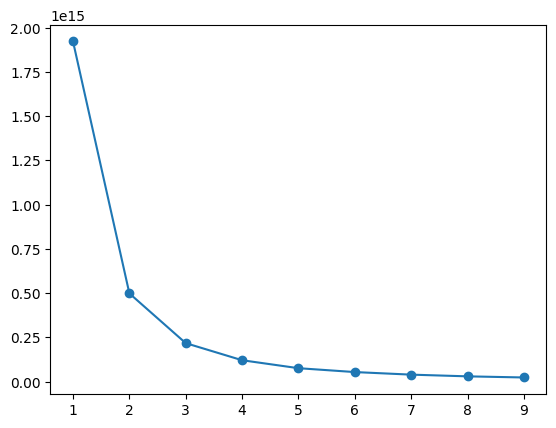

In [14]:
plt.plot(np.arange(1,10), i ,marker='o')
plt.show()

# ***4 cluster based on inertia***

# ***Models***

# ***KMeans***

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(bank)

labels = kmeans.labels_
score = silhouette_score(bank,labels)

ari_score = adjusted_rand_score(labels,bank)
# nmi_score = normalized_mutual_info_score(bank,labels)

wcss = kmeans.inertia_

# print(kmeans.cluster_centers_)
print(score)
print(wcss)
# print(ari_score)

0.7041682764393274
179.332913179717


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# Fit the model to the data
clustering.fit(bank)

# Get the cluster labels
labelss = clustering.labels_

score = silhouette_score(bank,labelss)

# Print the cluster labels
print(score)

0.7089320405811247


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# *DBSCAN*

In [60]:
db = DBSCAN(eps=3, min_samples=2).fit(bank)
labe = db.labels_

score = silhouette_score(bank,labe)

print(score)

0.9083834454815235


# ***-1 indicates noise*** in dbscan

# ***mean-shift***

In [61]:
# Estimate the bandwidth parameter
bandwidth = estimate_bandwidth(bank, quantile=0.2, n_samples=500)

# Fit the MeanShift algorithm
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(bank)

# Extract the cluster centers and label
cluster_centers = mean_shift.cluster_centers_
label = mean_shift.labels_
score = silhouette_score(bank,label)
# Number of clusters found
n_clusters = len(np.unique(label))
print(f"Number of estimated clusters: {n_clusters}")
print(score)
# Plotting the results
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=label, cmap='viridis', marker='o')
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='x') # plot cluster centers
# plt.title('Mean Shift Clustering')
# plt.show()


Number of estimated clusters: 4
0.7594148993229192
